
# **Telco Customer Churn Prediction**

**Exploratory Data Analysis**

Importing Libraries

In [2]:
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.size

147903

In [6]:
df.shape

(7043, 21)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
#to find null values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} → {len(outliers)} outliers")


SeniorCitizen → 1142 outliers
tenure → 0 outliers
MonthlyCharges → 0 outliers


In [12]:
df.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [13]:
correlation = df.select_dtypes(include=['float64','int64']).corr()

<Axes: >

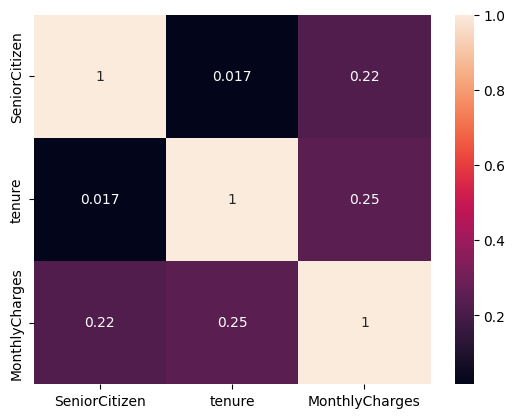

In [14]:
sns.heatmap(correlation, annot=True, xticklabels = correlation.columns, yticklabels=correlation.columns)

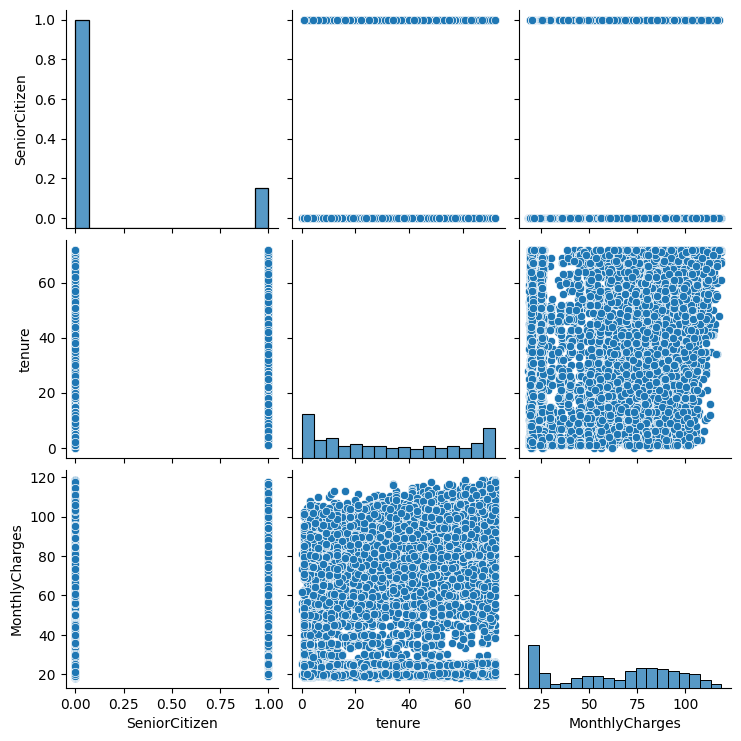

In [15]:
sns.pairplot(df)

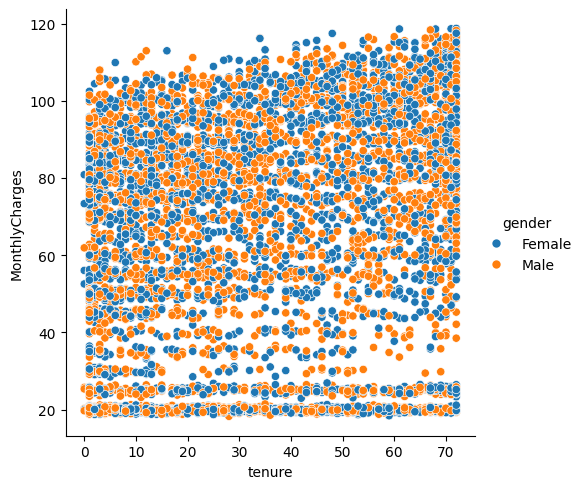

In [16]:
sns.relplot(x='tenure', y='MonthlyCharges', hue='gender', data=df)

In [17]:
def countplot_function(dataFrame = df, column = 'gender',figsize= (15, 10), palette = "viridis", hue=None):
  plt.figure(figsize=figsize)
  sns.countplot(x=column, data=dataFrame, palette=palette)
  plt.title("{} countplot".format(column), fontsize=15)
  plt.xlabel("{}".format(column), fontsize=10)
  plt.ylabel("Count", fontsize=10)

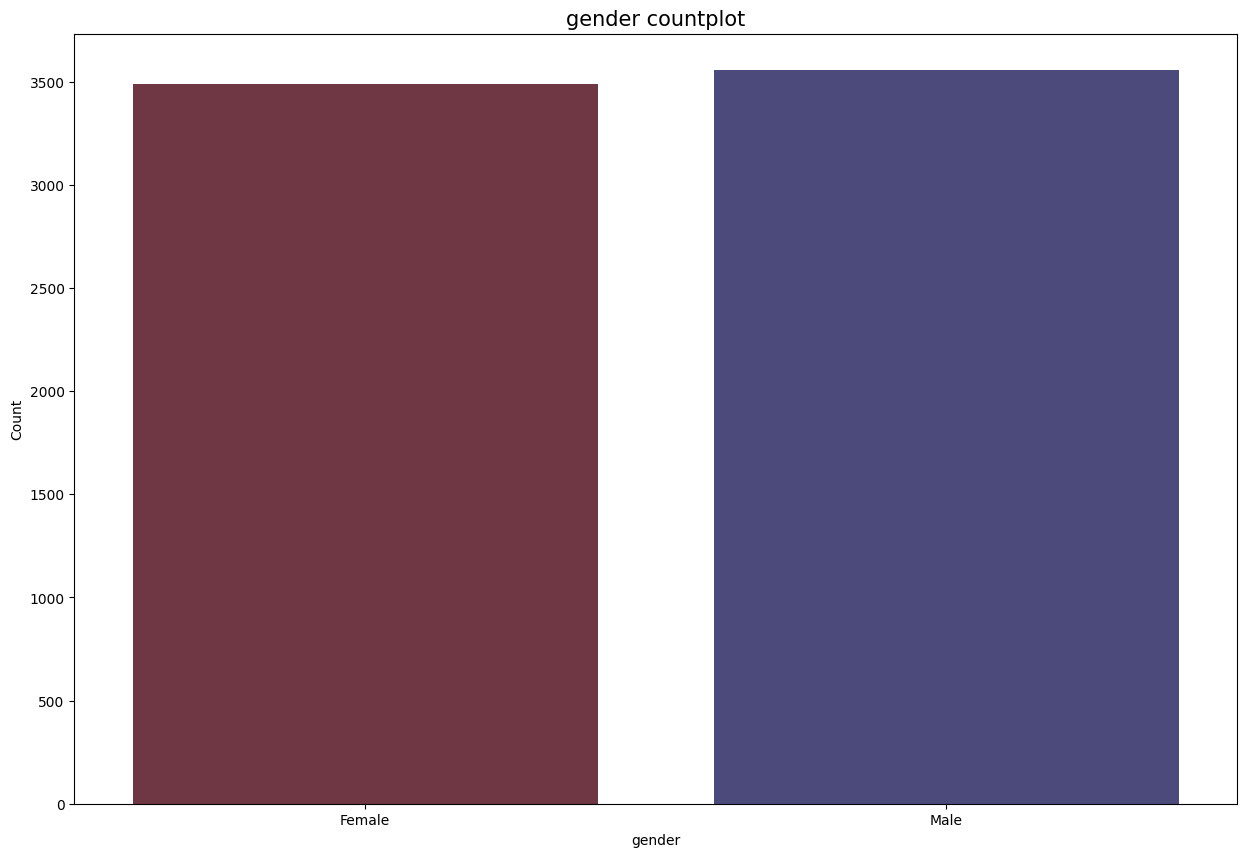

In [18]:
countplot_function(dataFrame = df, column = 'gender', palette = "icefire_r", hue='SeniorCitizen')
plt.show()

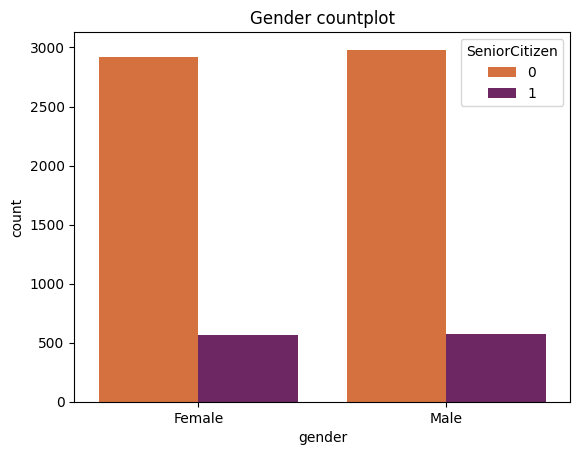

In [19]:
sns.countplot(x='gender', data=df, palette='inferno_r', hue='SeniorCitizen')
plt.title('Gender countplot')
plt.show()


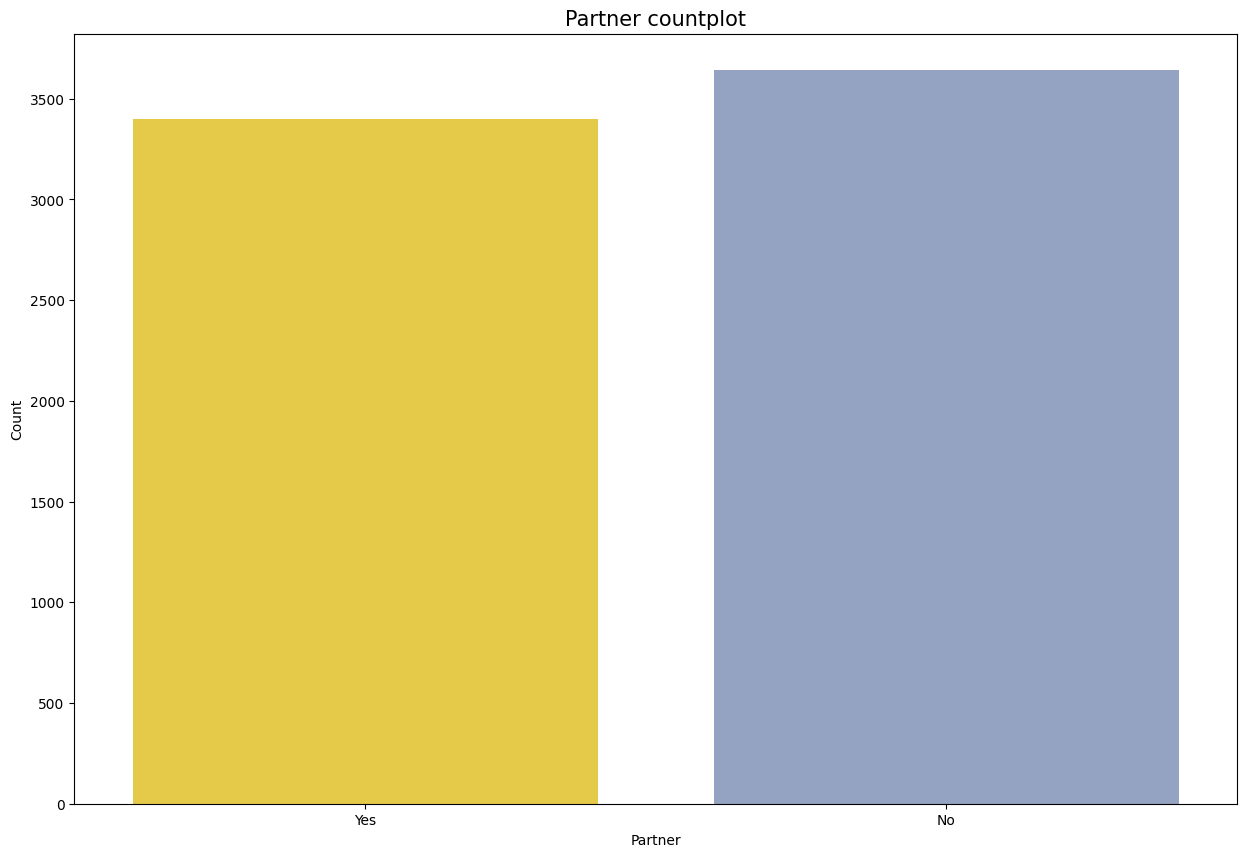

In [20]:
countplot_function(dataFrame = df, column = 'Partner', palette = "Set2_r")
plt.show()

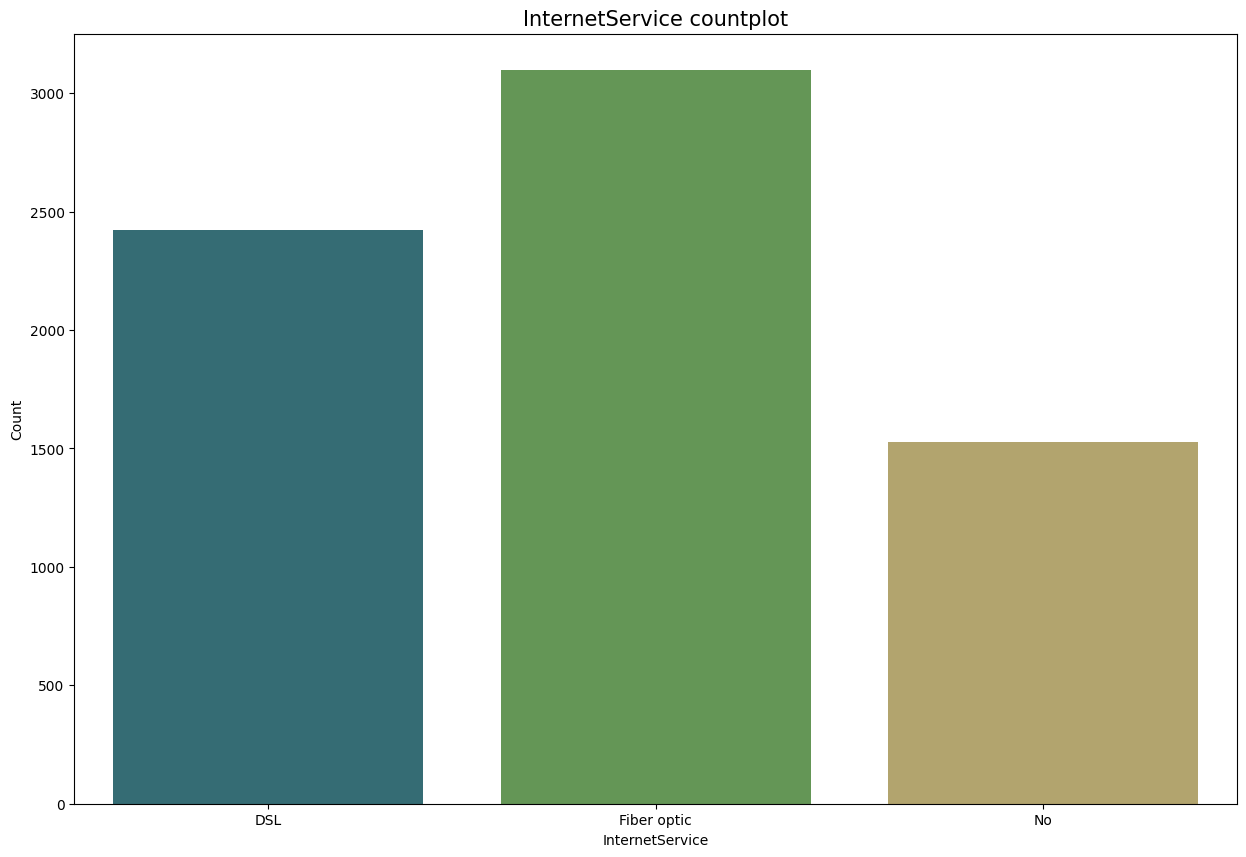

In [21]:
countplot_function(dataFrame = df, column = 'InternetService', palette = "gist_earth")
plt.show()

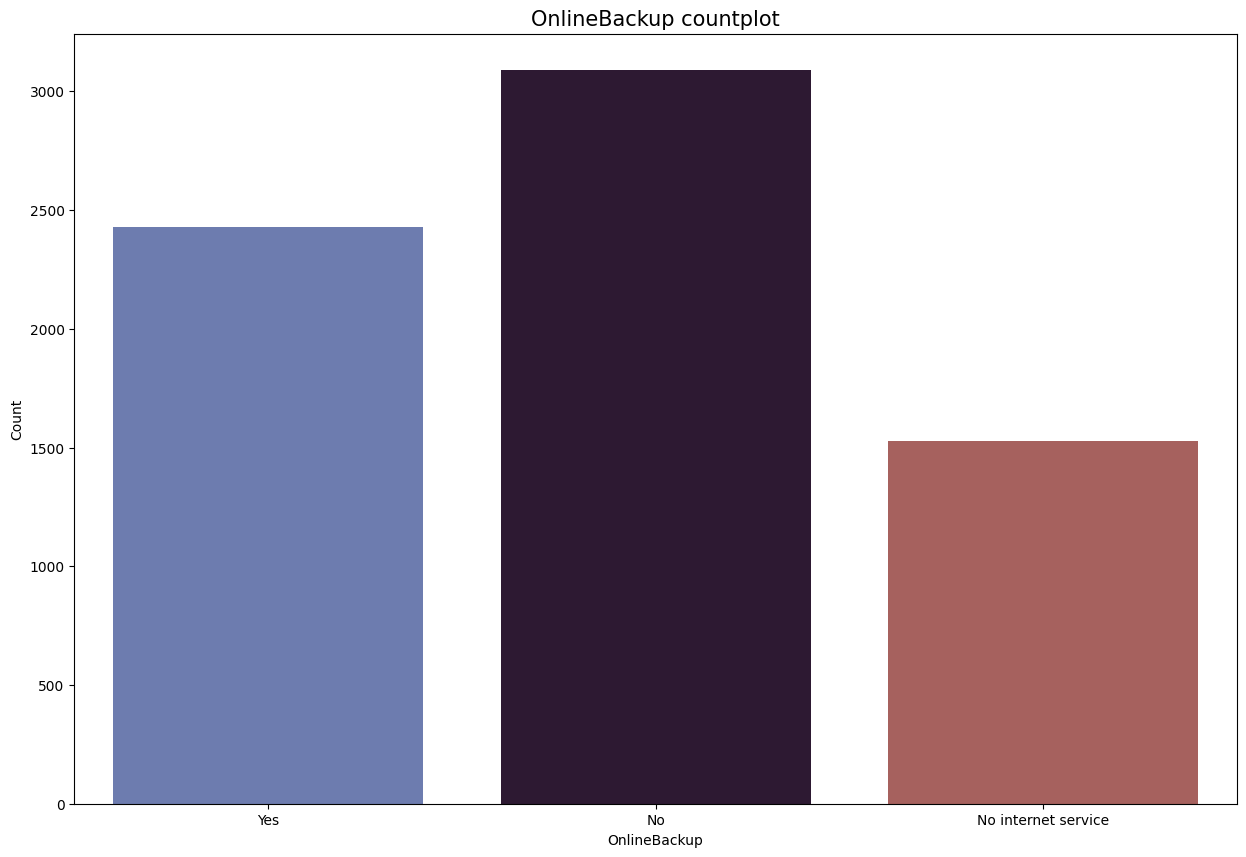

In [22]:
countplot_function(dataFrame = df, column = 'OnlineBackup', palette = "twilight")
plt.show()

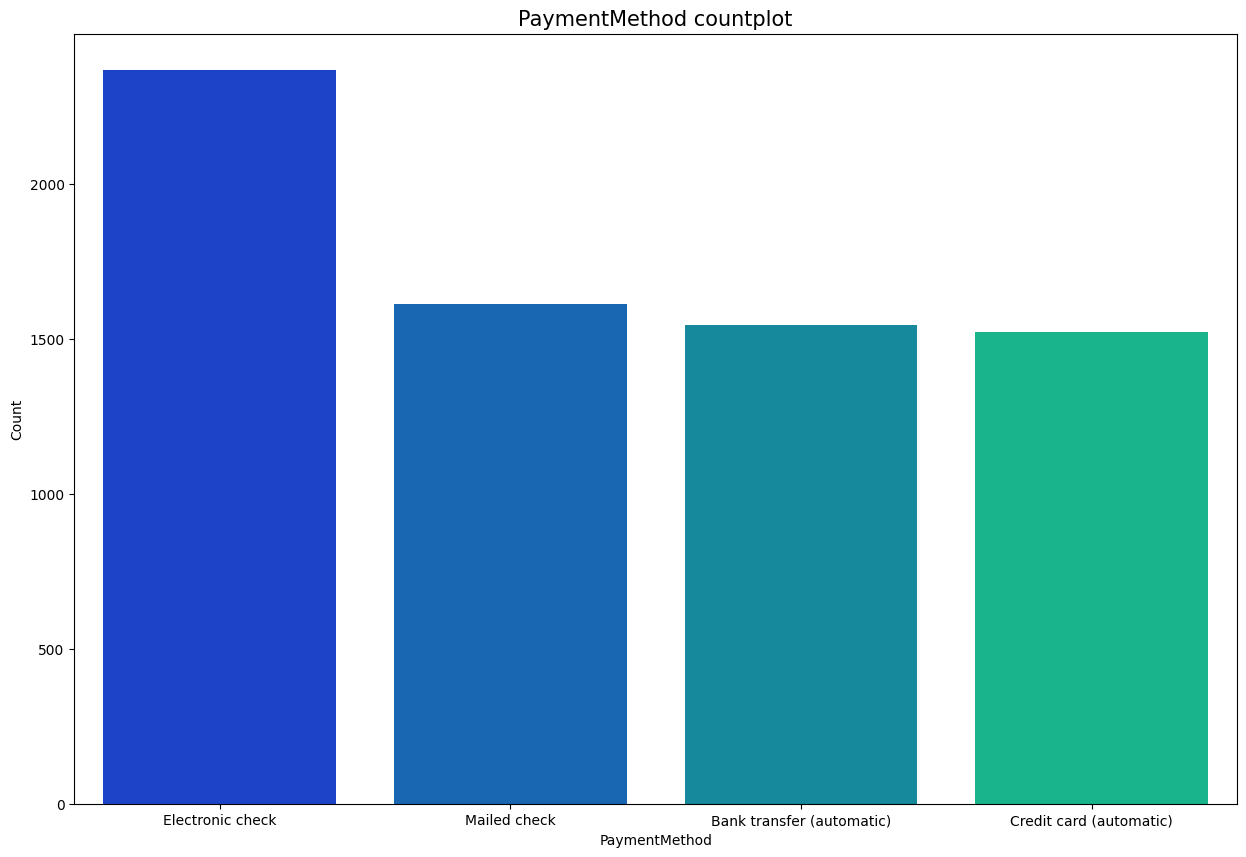

In [23]:
countplot_function(dataFrame = df, column = 'PaymentMethod', palette = "winter")
plt.show()

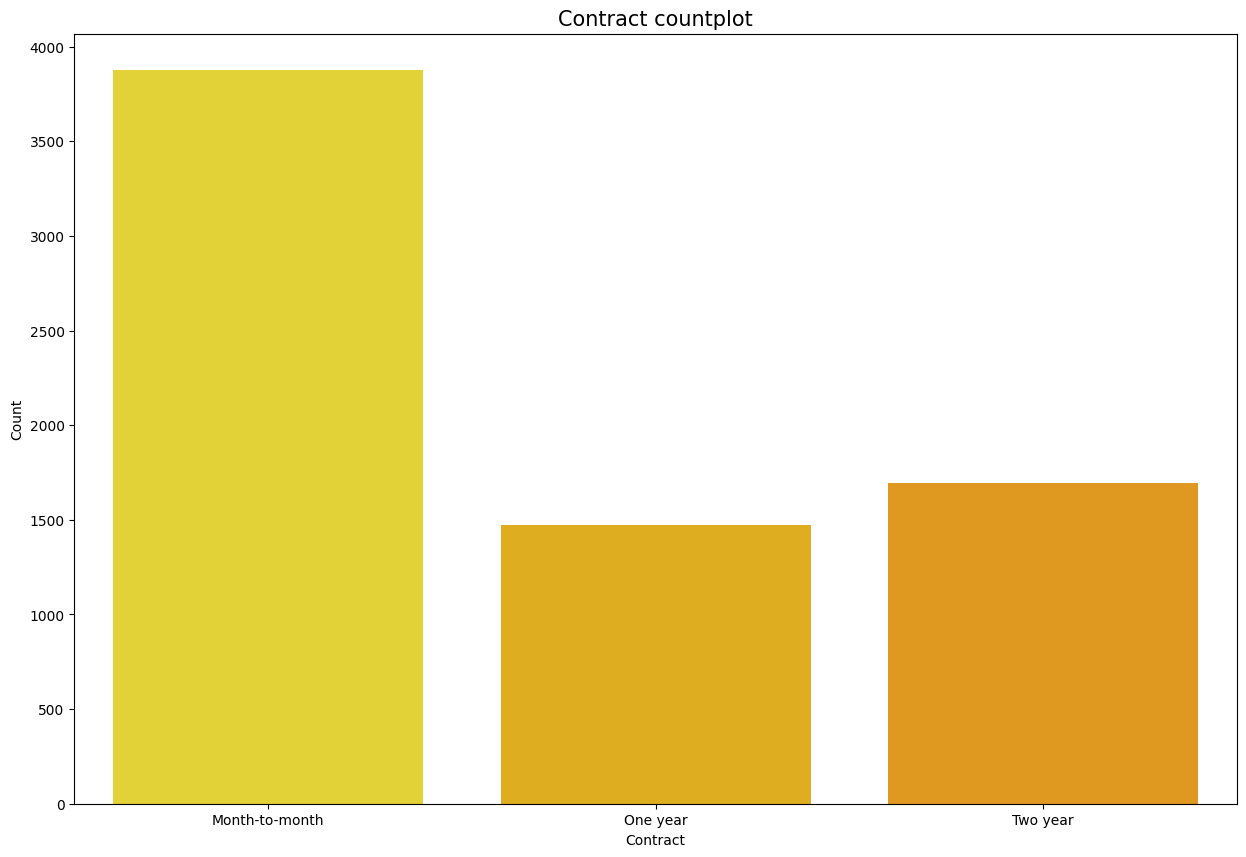

In [24]:
countplot_function(dataFrame=df, column='Contract', palette="Wistia")
plt.show()

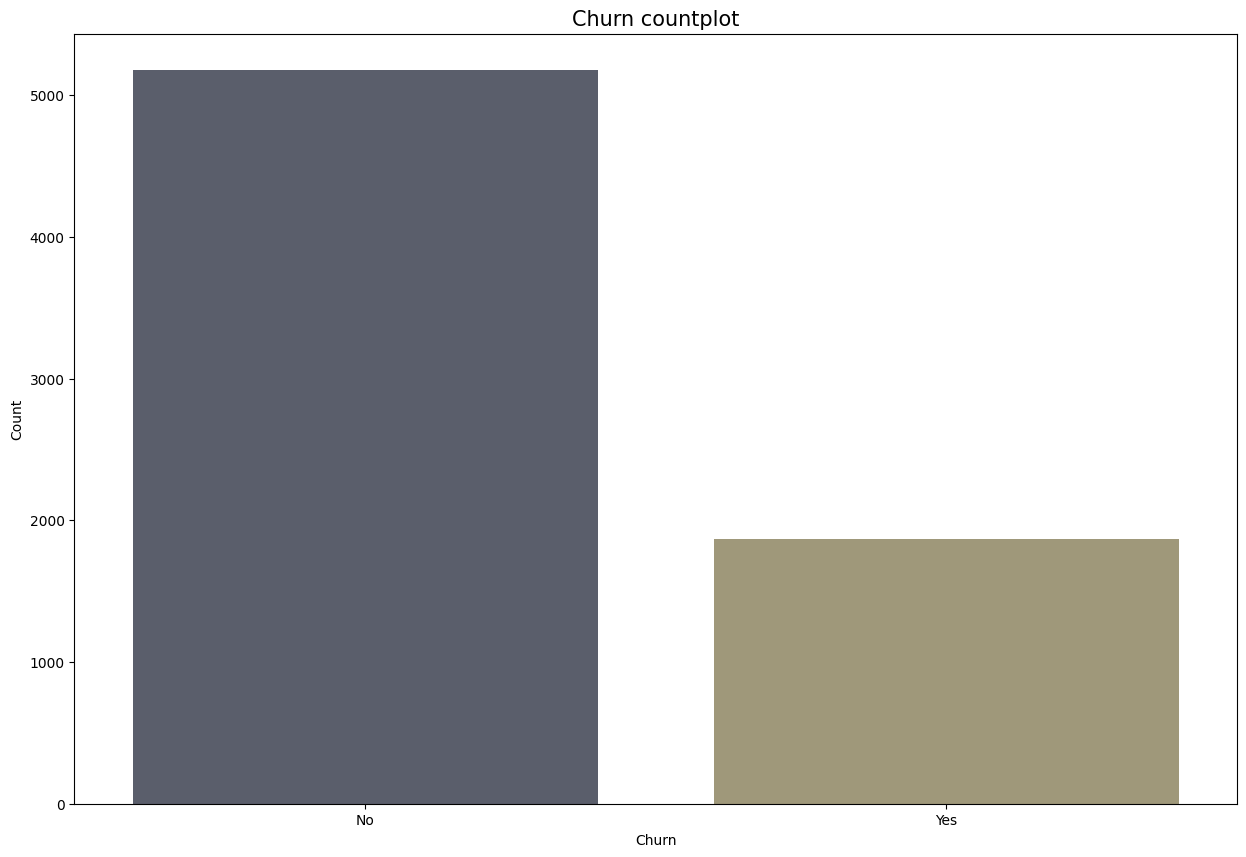

In [25]:
countplot_function(dataFrame=df, column="Churn", palette="cividis")
plt.show()

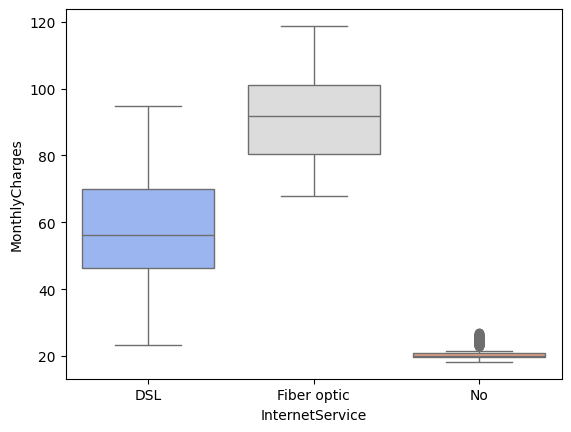

In [26]:
sns.boxplot(data=df, x="InternetService", y="MonthlyCharges", palette="coolwarm")
plt.show()


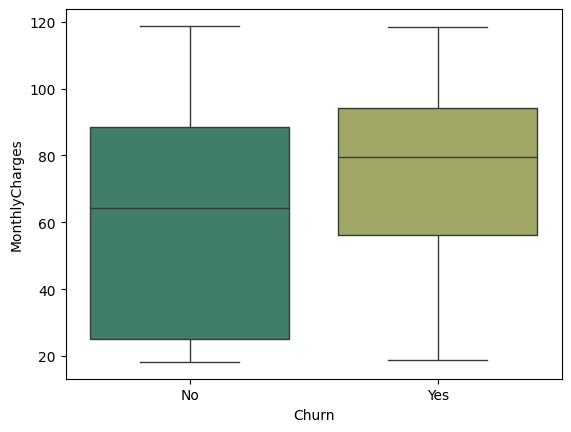

In [27]:
sns.boxplot(data=df, x="Churn", y="MonthlyCharges", palette="gist_earth")
plt.show()


In [28]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(' ', '1394.55'))

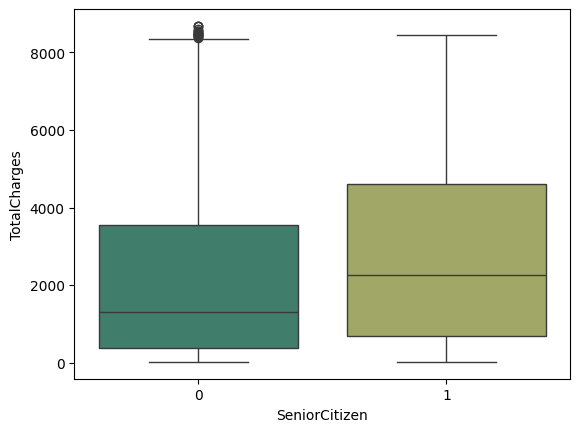

In [29]:
sns.boxplot(data=df, x="SeniorCitizen", y="TotalCharges", palette="gist_earth")
plt.show()

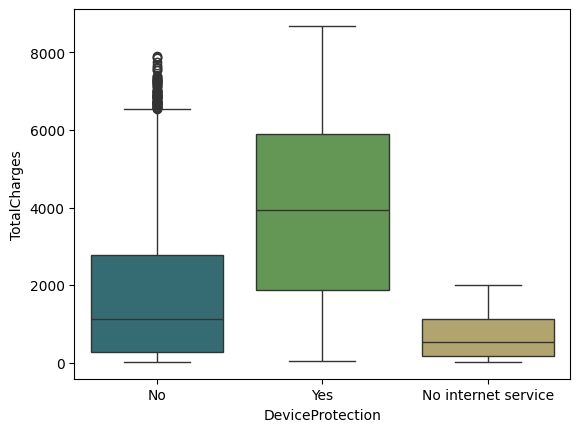

In [30]:
sns.boxplot(data=df, x="DeviceProtection", y="TotalCharges", palette="gist_earth")
plt.show()

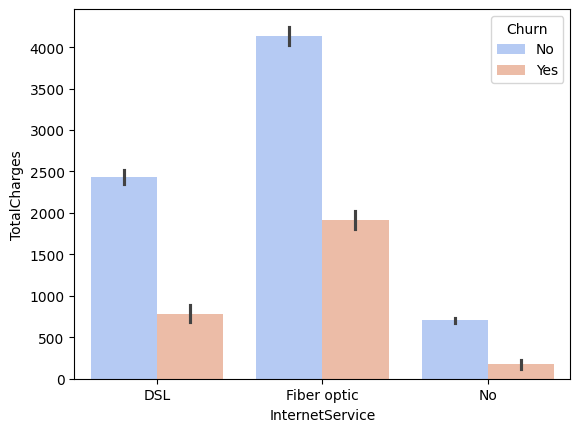

In [31]:
sns.barplot(data=df, x='InternetService', y='TotalCharges', hue='Churn', palette='coolwarm')
plt.show()

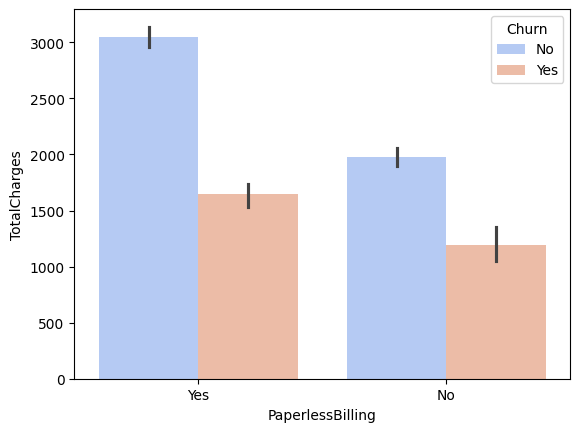

In [32]:
sns.barplot(data=df, x='PaperlessBilling', y='TotalCharges', hue='Churn', palette='coolwarm')
plt.show()

In [33]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


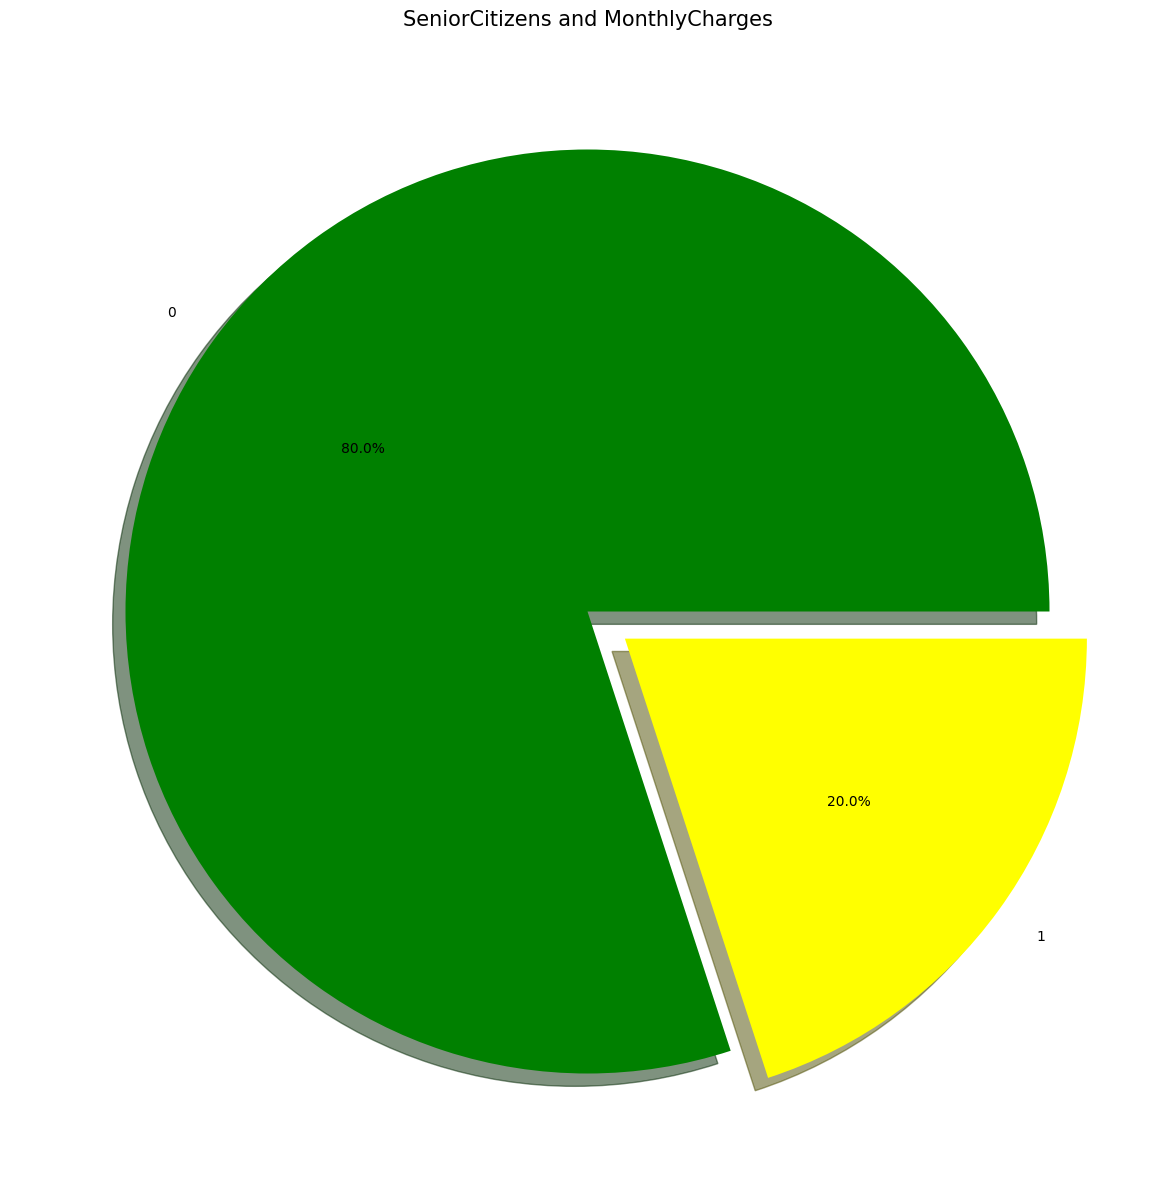

In [34]:
plt.figure(figsize=(15, 15))
plt.pie(x=df.groupby(by='SeniorCitizen').sum()['MonthlyCharges'], labels=df.groupby(by='SeniorCitizen').sum().index, explode=(0, 0.1), shadow= True, autopct= '%1.1f%%', colors=['Green', 'Yellow'])
plt.title('SeniorCitizens and MonthlyCharges', fontsize=15)
plt.show()


In [35]:
df.groupby(by='PhoneService').sum('MonthlyCharges')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
PhoneService,,,,
No,104,21645,28663.5,1023084.05
Yes,1038,206345,427453.1,15048424.70


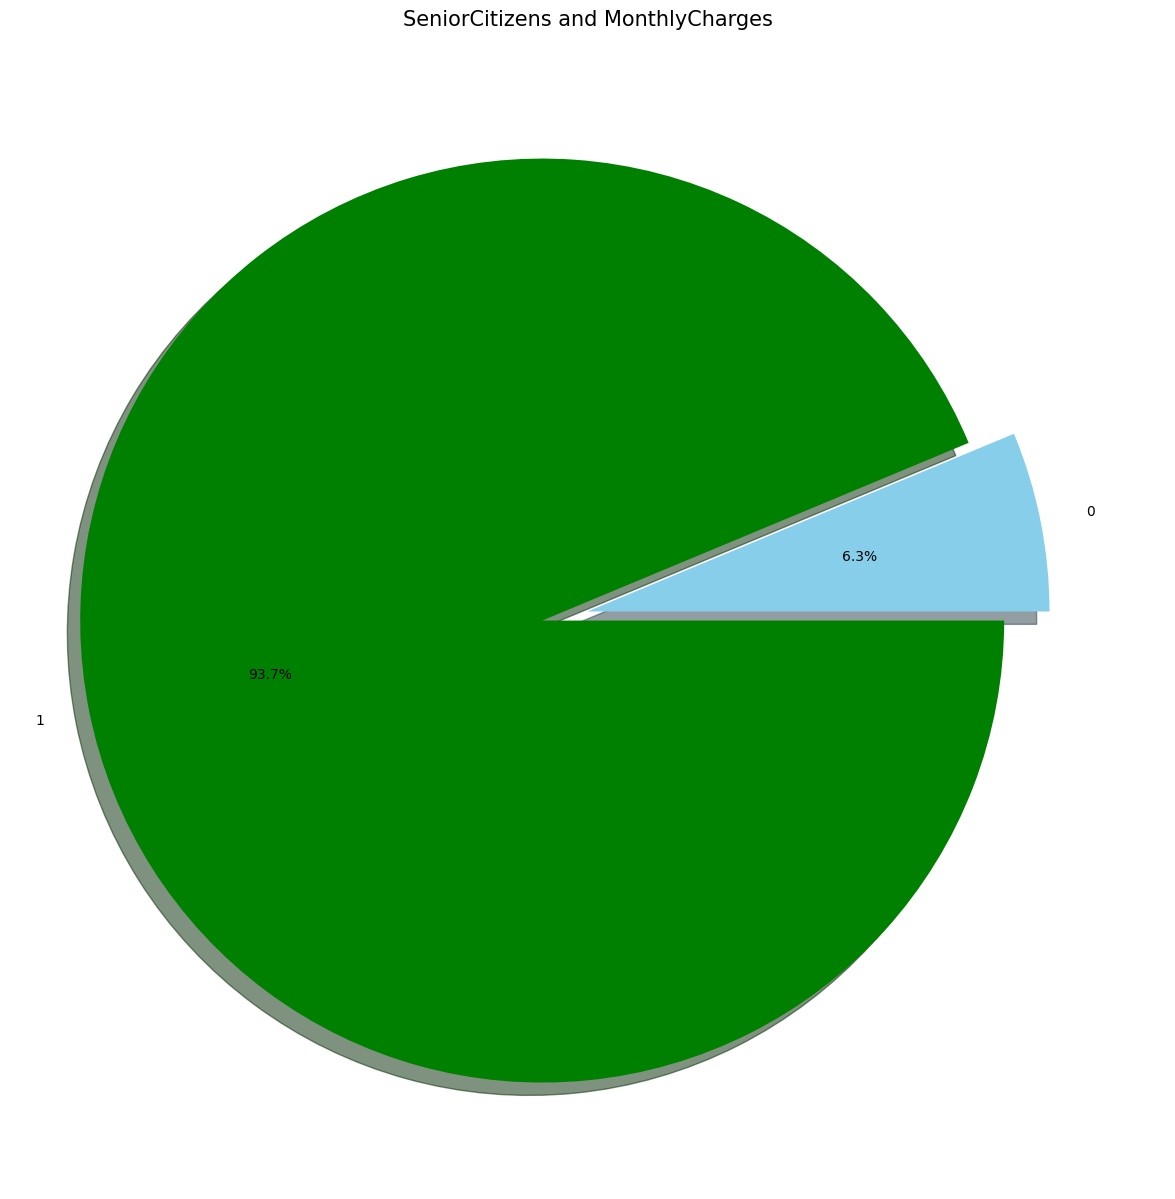

In [36]:
plt.figure(figsize=(15, 15))
plt.pie(x=df.groupby(by='PhoneService').sum()['MonthlyCharges'], labels=df.groupby(by='SeniorCitizen').sum().index, explode=(0, 0.1), shadow= True, autopct= '%1.1f%%', colors=['SkyBlue', 'Green'])
plt.title('SeniorCitizens and MonthlyCharges', fontsize=15)
plt.show()

In [37]:
df.groupby(by='InternetService').sum('MonthlyCharges')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
InternetService,,,,
DSL,259,79461,140665.35,5128383.60
Fiber optic,831,101914,283284.40,9923622.95
No,52,46615,32166.85,1019502.20


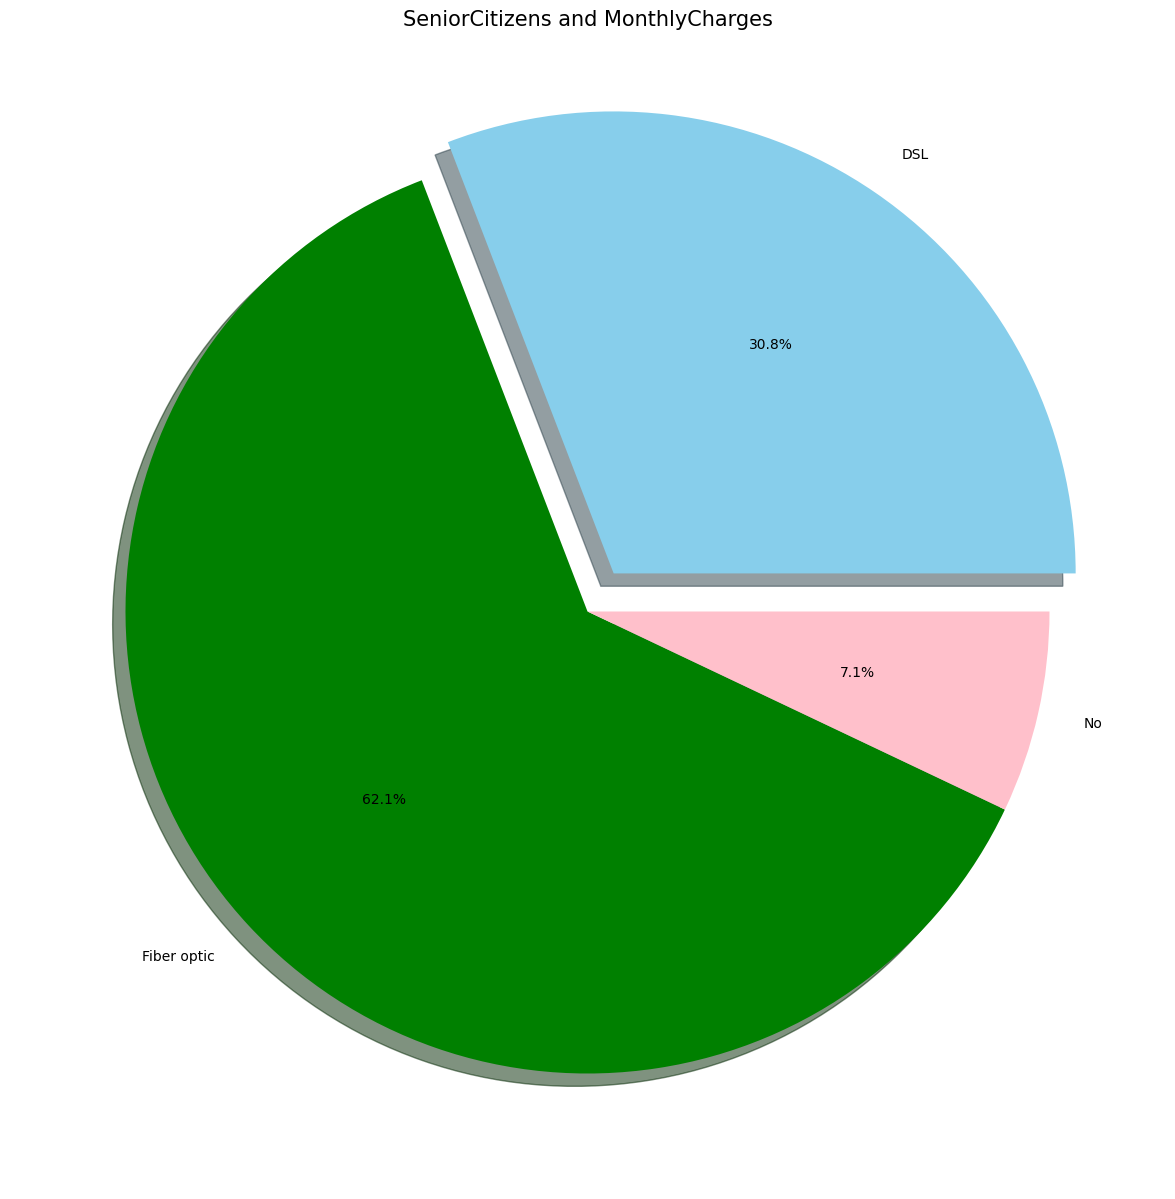

In [38]:
plt.figure(figsize=(15, 15))
plt.pie(x=df.groupby(by='InternetService').sum()['MonthlyCharges'], labels=df.groupby(by='InternetService').sum().index, explode=(0.1, 0, 0), shadow= True, autopct= '%1.1f%%', colors=['SkyBlue', 'Green', 'Pink'])
plt.title('SeniorCitizens and MonthlyCharges', fontsize=15)
plt.show()

In [39]:
df_categorical = df.select_dtypes(include=['object'])

In [40]:
df_numerical = df.select_dtypes(exclude=['object'])

In [41]:
df_categorical.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [42]:
df_numerical.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [43]:
#removing feartures that are not needed for analysis
df_categorical.drop(columns=['customerID'], axis=1, inplace=True)

In [44]:
encoded = pd.get_dummies(df_categorical.gender, drop_first=True)


In [45]:
df_dummy_encoding = pd.get_dummies(df_categorical, drop_first = True)

In [46]:
df_final = pd.concat([df_dummy_encoding, df_numerical], axis = 1)

In [47]:
df_final.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,False,True,False,False,True,False,False,False,False,False,...,False,True,False,True,False,False,0,1,29.85,29.85
1,True,False,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,0,34,56.95,1889.50
2,True,False,False,True,False,False,False,False,False,True,...,False,True,False,False,True,True,0,2,53.85,108.15
3,True,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,0,45,42.30,1840.75
4,False,False,False,True,False,False,True,False,False,False,...,False,True,False,True,False,True,0,2,70.70,151.65


In [48]:
df_final.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,False,True,False,False,True,False,False,False,False,False,...,False,True,False,True,False,False,0,1,29.85,29.85
1,True,False,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,0,34,56.95,1889.50
2,True,False,False,True,False,False,False,False,False,True,...,False,True,False,False,True,True,0,2,53.85,108.15
3,True,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,0,45,42.30,1840.75
4,False,False,False,True,False,False,True,False,False,False,...,False,True,False,True,False,True,0,2,70.70,151.65


In [49]:
df.select_dtypes(include=['number']).corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825466
MonthlyCharges,0.220173,0.247900,1.000000,0.650865
TotalCharges,0.102652,0.825466,0.650865,1.000000


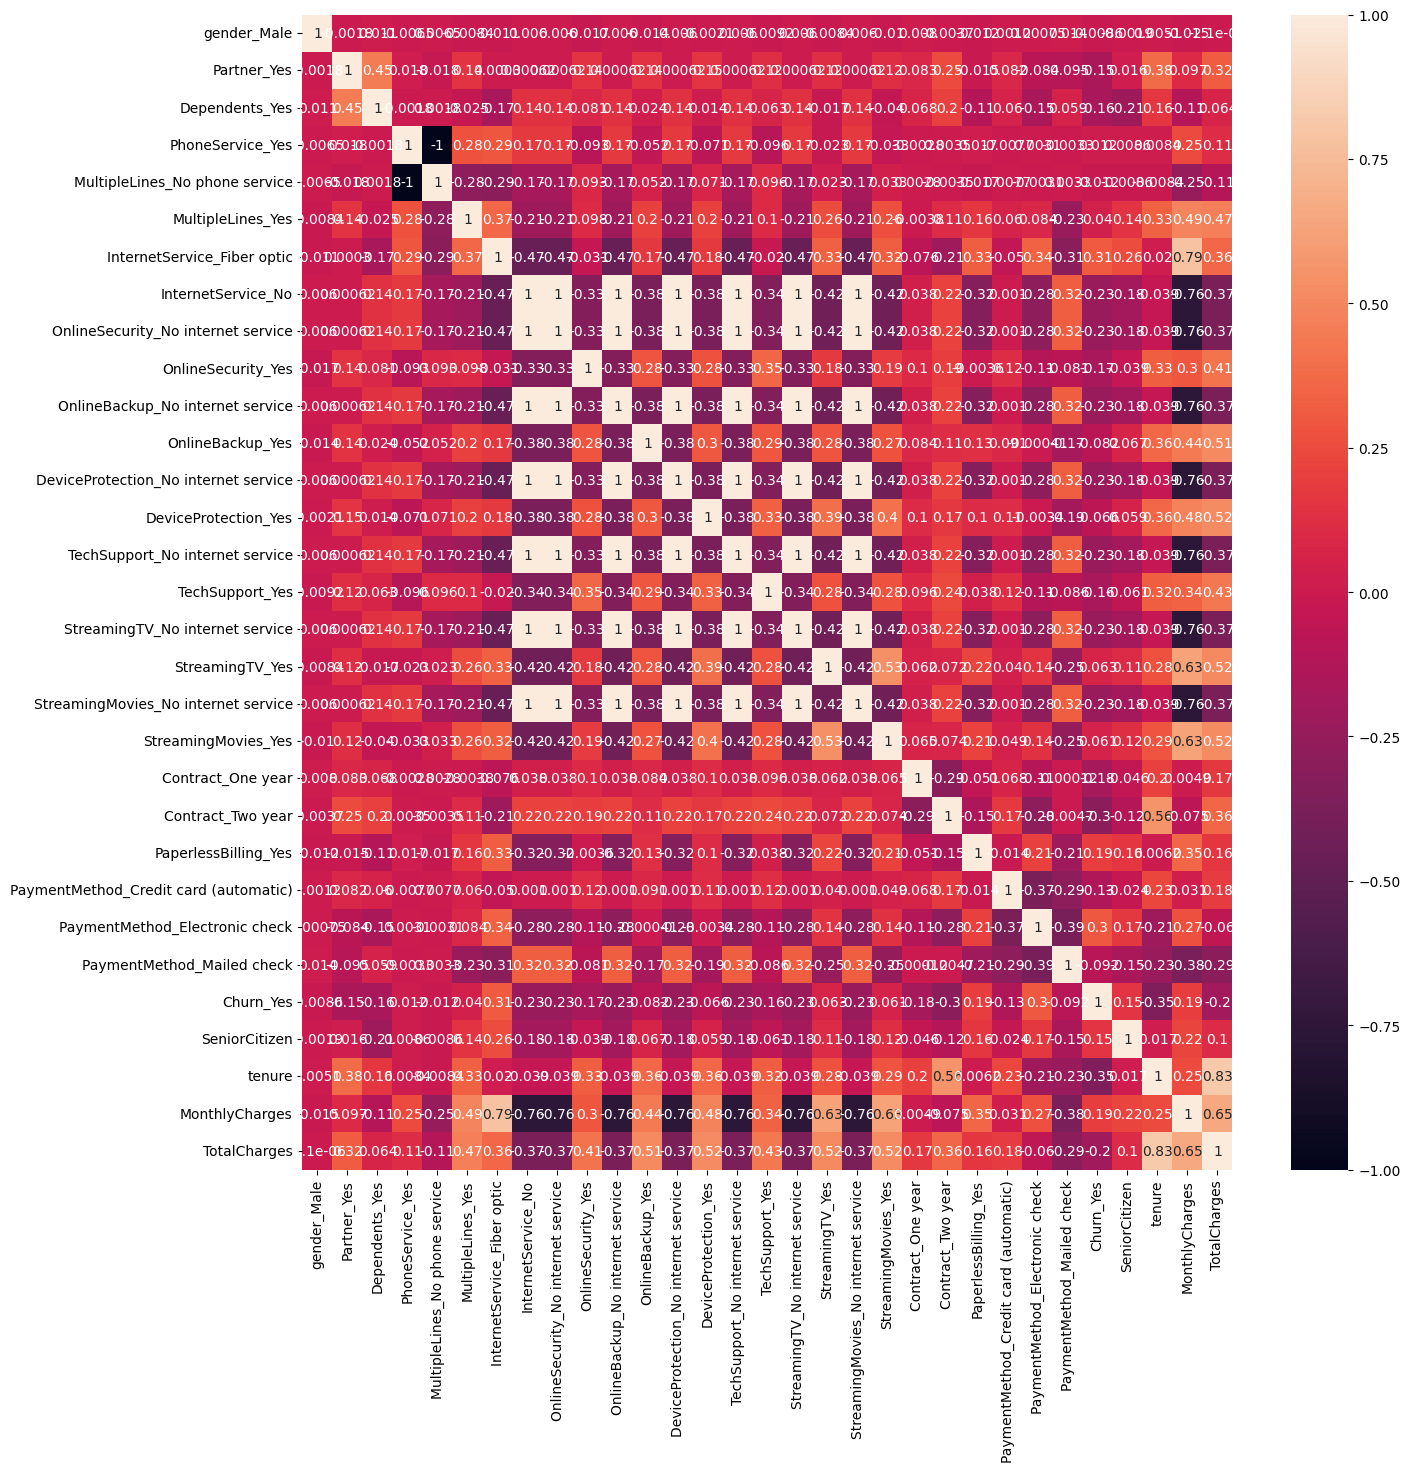

In [50]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_final.corr(), annot = True)
plt.show()

In [51]:
X = df_final.drop(['Churn_Yes'], axis = 1)
Y = df_final['Churn_Yes']

# **MACHINE LEARNING MODEL**


Train Test Split

In [52]:
X_train, X_cv, Y_train, Y_cv  = train_test_split(X, Y, test_size = 0.3, random_state = 101)


STANDARDIZATION

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_cv_transformed = scaler.transform(X_cv)

In [54]:
len(X_train_transformed)

4930

In [55]:
len(X_cv_transformed)

2113

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(n_components= 30)
pca.fit(X_train_transformed)
X_train_reduced = pca.transform(X_train_transformed)
X_cv_reduced = pca.transform(X_cv_transformed)

In [58]:
X_train_reduced.shape

(4930, 30)

In [59]:
X_train_transformed.shape

(4930, 30)

In [60]:
principal_components = list(range(1, len(pca.explained_variance_ratio_) + 1))

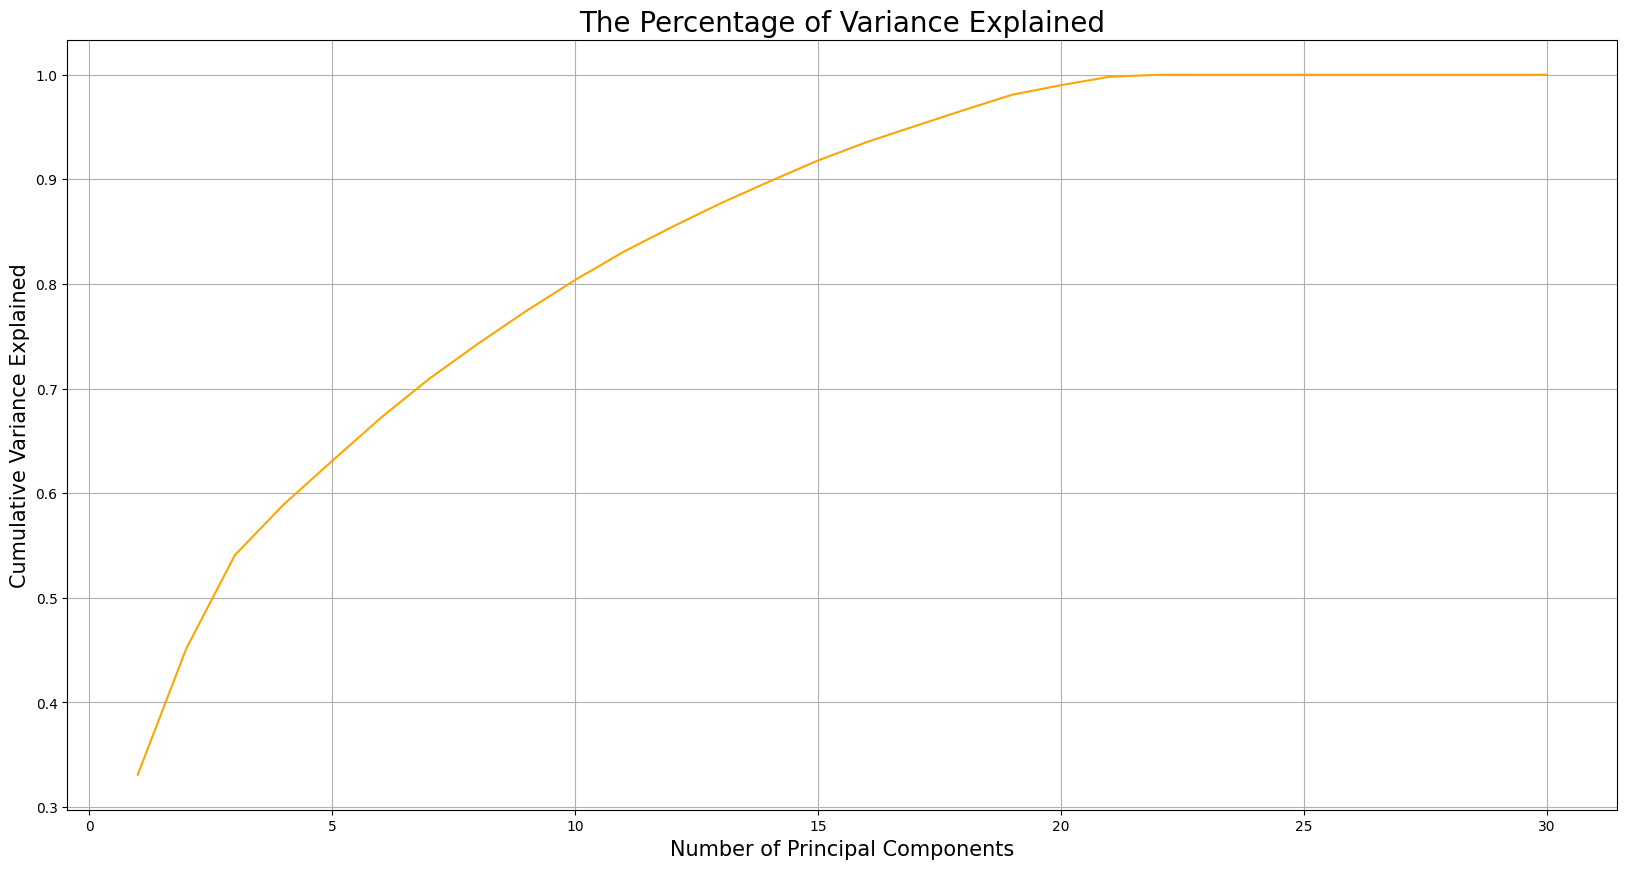

In [61]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=range(1, len(pca.explained_variance_ratio_)+1),
             y=np.cumsum(pca.explained_variance_ratio_),
             color='orange')
plt.xlabel('Number of Principal Components', fontsize=15)
plt.ylabel('Cumulative Variance Explained', fontsize=15)
plt.title("The Percentage of Variance Explained", fontsize=20)
plt.grid(True)
plt.show()


In [62]:
print(len(X_train_transformed))

4930


In [63]:
print(len(X_cv_transformed))

2113


In [64]:
Y_train.value_counts()

,count
Churn_Yes,
False,3628
True,1302


In [65]:
Y_cv.value_counts()

,count
Churn_Yes,
False,1546
True,567


In [66]:
len(X_train_transformed[0])

30

K NEIGHBORS CLASSIFIER

CLASS BALANCING

In [67]:
sampler = SMOTE()
X_train_transformed, Y_train = sampler.fit_resample(X_train_transformed, Y_train)
X_cv_transformed, Y_cv = sampler.fit_resample(X_cv_transformed, Y_cv)

In [68]:
model = KNeighborsClassifier()
model.fit(X_train_transformed, Y_train)
Y_predictions = model.predict(X_cv_transformed)

CONFUSION MATRIX

In [69]:
from sklearn.metrics import confusion_matrix, classification_report


In [70]:
print(confusion_matrix(Y_cv, Y_predictions))

[[1039  507]
 [ 382 1164]]


In [71]:
print(classification_report(Y_cv, Y_predictions))

              precision    recall  f1-score   support

       False       0.73      0.67      0.70      1546
        True       0.70      0.75      0.72      1546

    accuracy                           0.71      3092
   macro avg       0.71      0.71      0.71      3092
weighted avg       0.71      0.71      0.71      3092



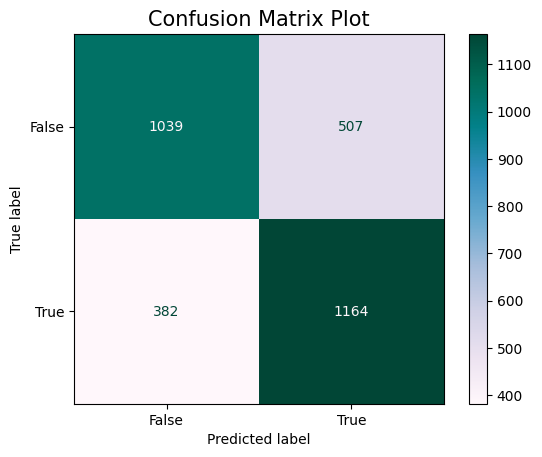

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_cv_transformed, Y_cv, cmap='PuBuGn')

plt.grid(False)
plt.title("Confusion Matrix Plot", fontsize=15)
plt.show()


ROC AUC CURVES

AUC for our classifier is: <function roc_curve at 0x7edfffc66480>


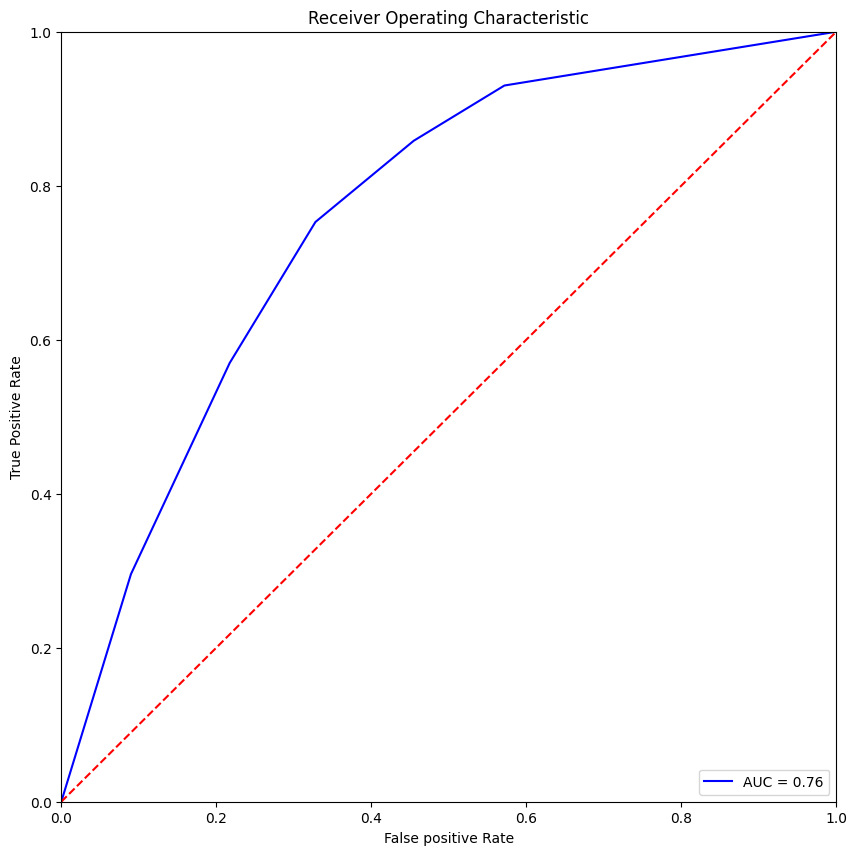

In [73]:
from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(Y_cv, preds)
roc_auc = auc(fpr, tpr)

print(f"AUC for our classifier is: {roc_curve}")

plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.show()

Support Vector Classifier

In [74]:
model = SVC(probability= True)
model.fit(X_train_transformed, Y_train)
Y_predictions = model.predict(X_cv_transformed)

Confusion Matrix

In [75]:
print(confusion_matrix(Y_cv, Y_predictions))

[[1223  323]
 [ 330 1216]]


Classification Report

In [78]:
print(classification_report(Y_cv, Y_predictions))

              precision    recall  f1-score   support

       False       0.79      0.79      0.79      1546
        True       0.79      0.79      0.79      1546

    accuracy                           0.79      3092
   macro avg       0.79      0.79      0.79      3092
weighted avg       0.79      0.79      0.79      3092



Plot Confusion Matrix

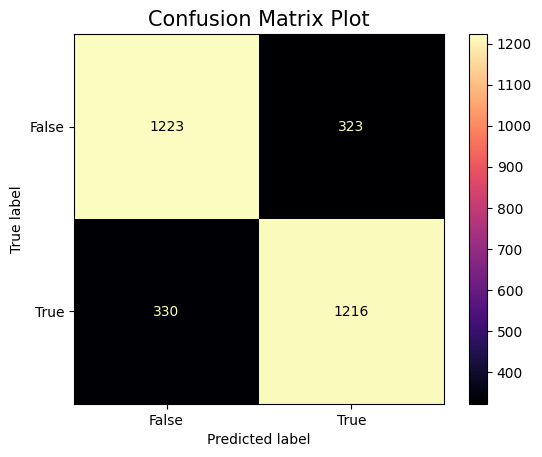

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the plot
ConfusionMatrixDisplay.from_estimator(model, X_cv_transformed, Y_cv, cmap='magma')

plt.grid(False)
plt.title("Confusion Matrix Plot", fontsize=15)
plt.show()


AUC for our classifier is: 0.8712240326410936


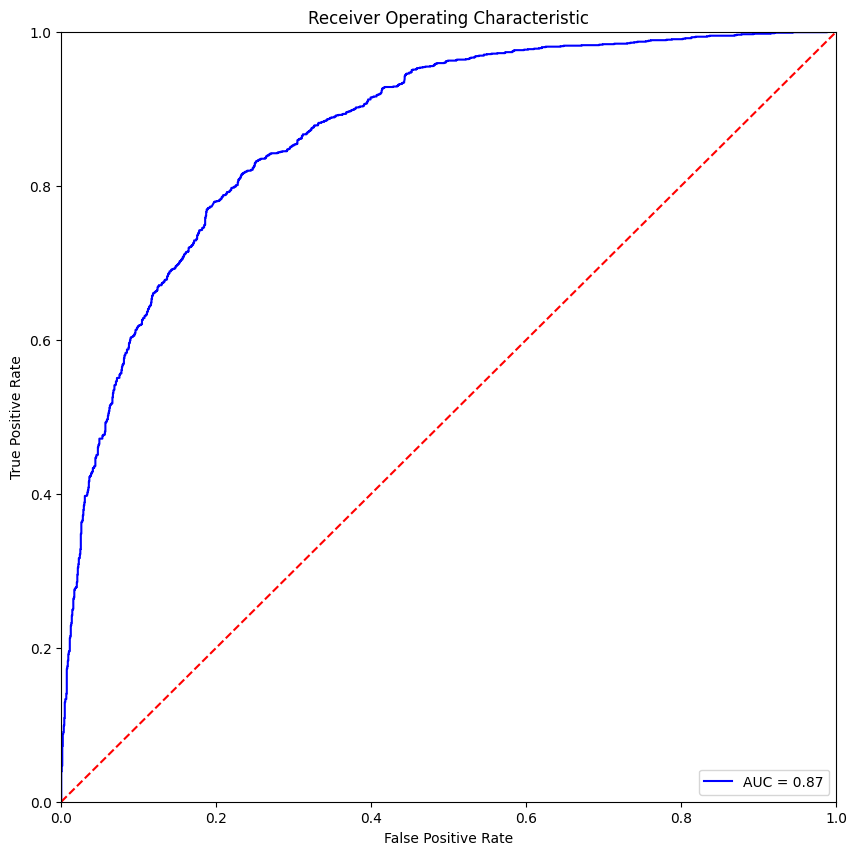

In [84]:
from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(Y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Logistic Regression

In [85]:
model= LogisticRegression()
model.fit(X_train_transformed, Y_train)
Y_predictions = model.predict(X_cv_transformed)

In [86]:
print(confusion_matrix(Y_cv, Y_predictions))

[[1161  385]
 [ 300 1246]]


In [87]:
print(classification_report(Y_cv, Y_predictions))

              precision    recall  f1-score   support

       False       0.79      0.75      0.77      1546
        True       0.76      0.81      0.78      1546

    accuracy                           0.78      3092
   macro avg       0.78      0.78      0.78      3092
weighted avg       0.78      0.78      0.78      3092



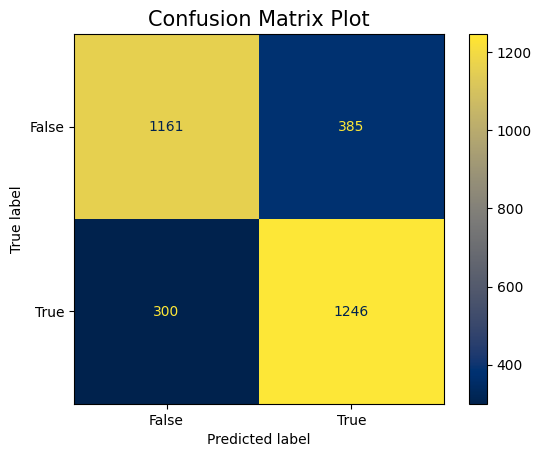

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the plot
ConfusionMatrixDisplay.from_estimator(model, X_cv_transformed, Y_cv, cmap='cividis')

plt.grid(False)
plt.title("Confusion Matrix Plot", fontsize=15)
plt.show()


AUC for our classifier is: 0.858867937790467


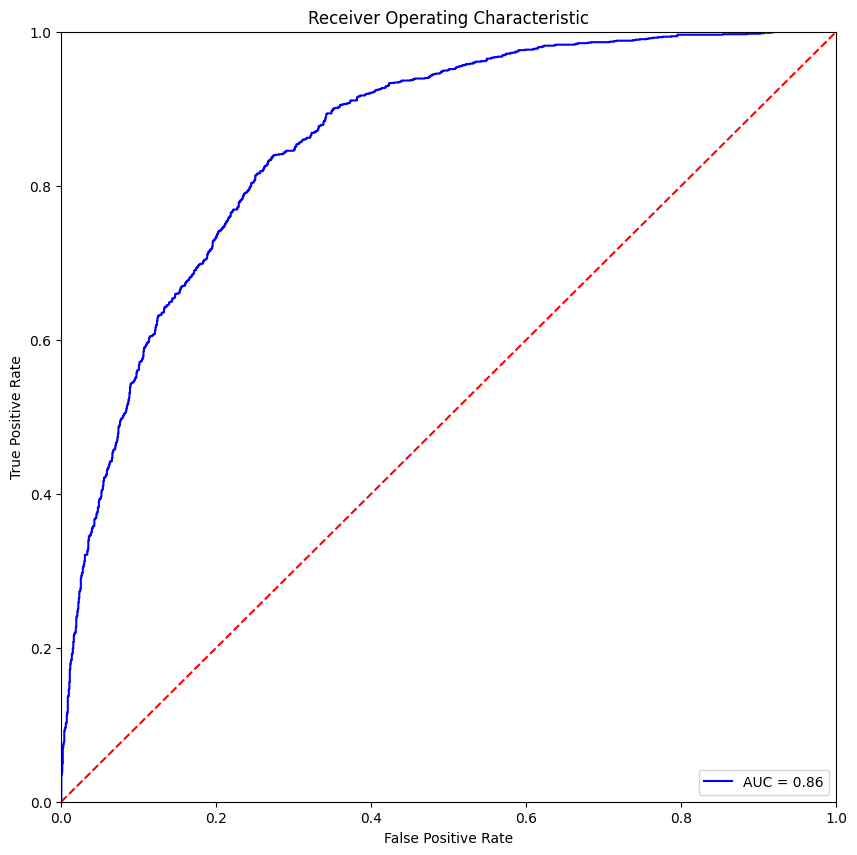

In [90]:
from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(Y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Decision Tree Classifier

In [91]:
model = DecisionTreeClassifier()
model.fit(X_train_transformed, Y_train)
Y_predictions = model.predict(X_cv_transformed)

In [92]:
print(confusion_matrix(Y_cv, Y_predictions))

[[1220  326]
 [ 487 1059]]


In [93]:
print(classification_report(Y_cv, Y_predictions))

              precision    recall  f1-score   support

       False       0.71      0.79      0.75      1546
        True       0.76      0.68      0.72      1546

    accuracy                           0.74      3092
   macro avg       0.74      0.74      0.74      3092
weighted avg       0.74      0.74      0.74      3092



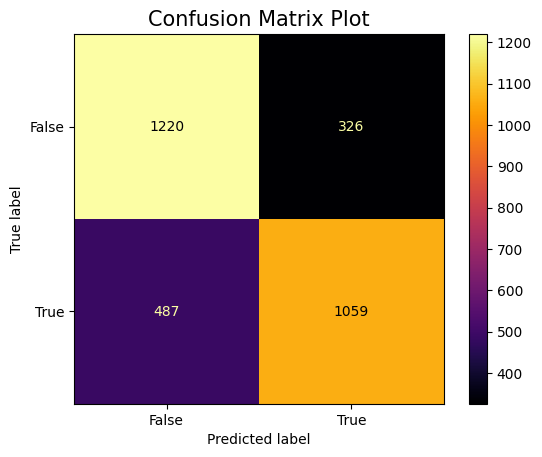

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the plot
ConfusionMatrixDisplay.from_estimator(model, X_cv_transformed, Y_cv, cmap='inferno')

plt.grid(False)
plt.title("Confusion Matrix Plot", fontsize=15)
plt.show()


AUC for our classifier is: 0.7407427087220871


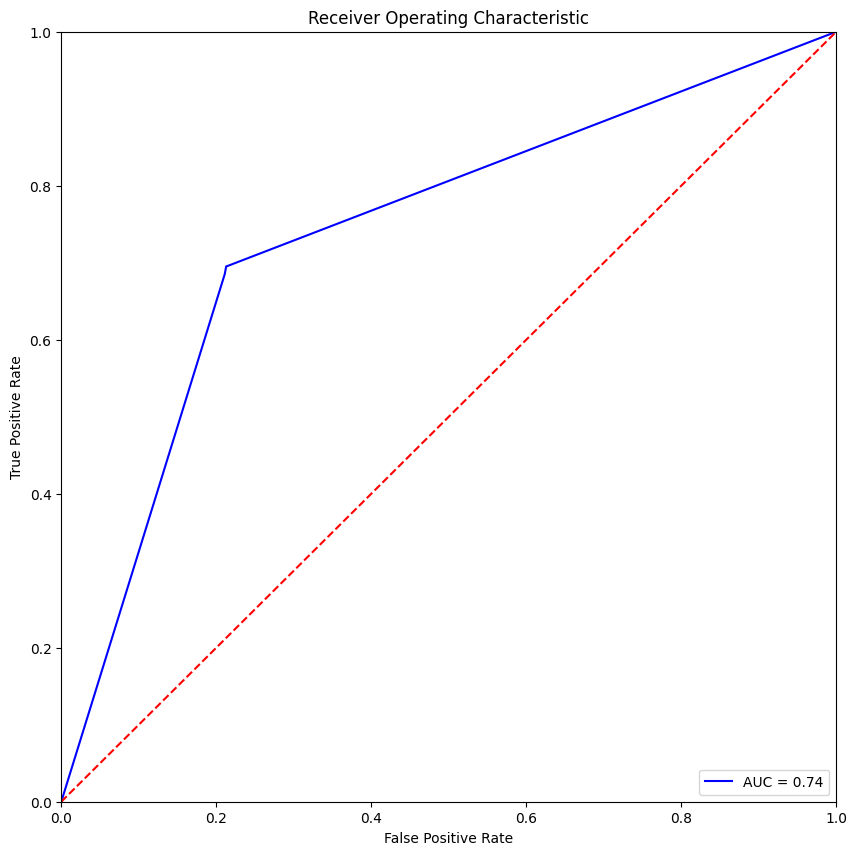

In [95]:
from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(Y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Gaussian Naive Bayes

In [97]:
model = GaussianNB()
model.fit(X_train_transformed, Y_train)
Y_predictions = model.predict(X_cv_transformed)

In [98]:
print(confusion_matrix(Y_cv, Y_predictions))

[[ 941  605]
 [ 194 1352]]


In [100]:
print(classification_report(Y_cv, Y_predictions))

              precision    recall  f1-score   support

       False       0.83      0.61      0.70      1546
        True       0.69      0.87      0.77      1546

    accuracy                           0.74      3092
   macro avg       0.76      0.74      0.74      3092
weighted avg       0.76      0.74      0.74      3092



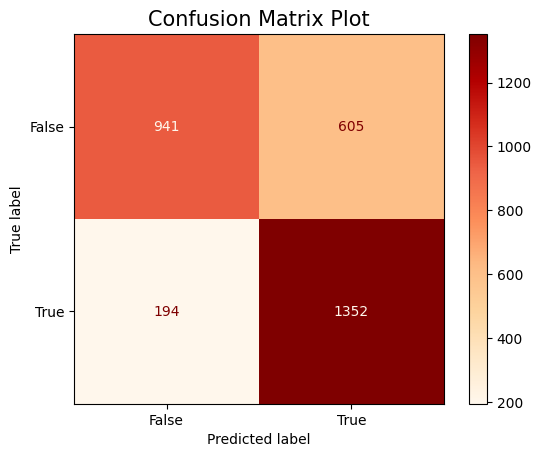

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the plot
ConfusionMatrixDisplay.from_estimator(model, X_cv_transformed, Y_cv, cmap='OrRd')

plt.grid(False)
plt.title("Confusion Matrix Plot", fontsize=15)
plt.show()

AUC for our classifier is: 0.832748703410211


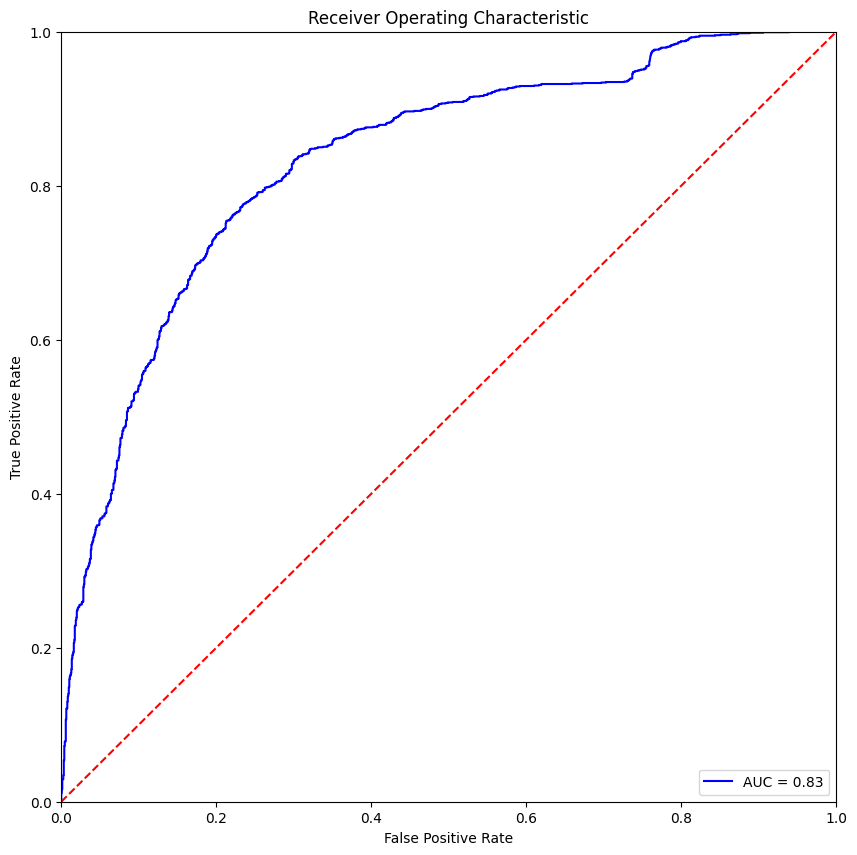

In [102]:
from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(Y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest Classifier

In [104]:
model = RandomForestClassifier()
model.fit(X_train_transformed, Y_train)
Y_predictions = model.predict(X_cv_transformed)

In [106]:
print(confusion_matrix(Y_cv, Y_predictions))

[[1321  225]
 [ 432 1114]]


In [107]:
print(classification_report(Y_cv, Y_predictions))

              precision    recall  f1-score   support

       False       0.75      0.85      0.80      1546
        True       0.83      0.72      0.77      1546

    accuracy                           0.79      3092
   macro avg       0.79      0.79      0.79      3092
weighted avg       0.79      0.79      0.79      3092



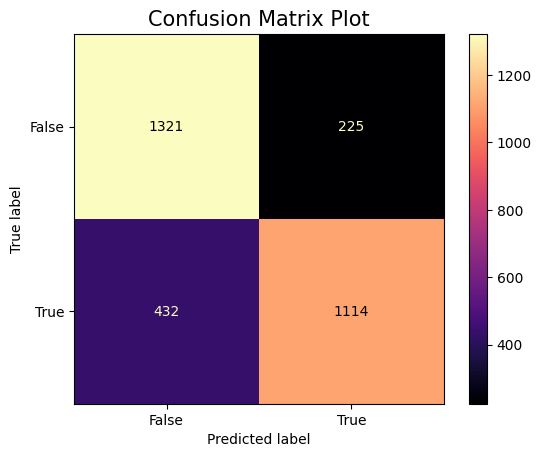

In [110]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the plot
ConfusionMatrixDisplay.from_estimator(model, X_cv_transformed, Y_cv, cmap='magma')

plt.grid(False)
plt.title("Confusion Matrix Plot", fontsize=15)
plt.show()

AUC for our classifier is: 0.8813944595157723


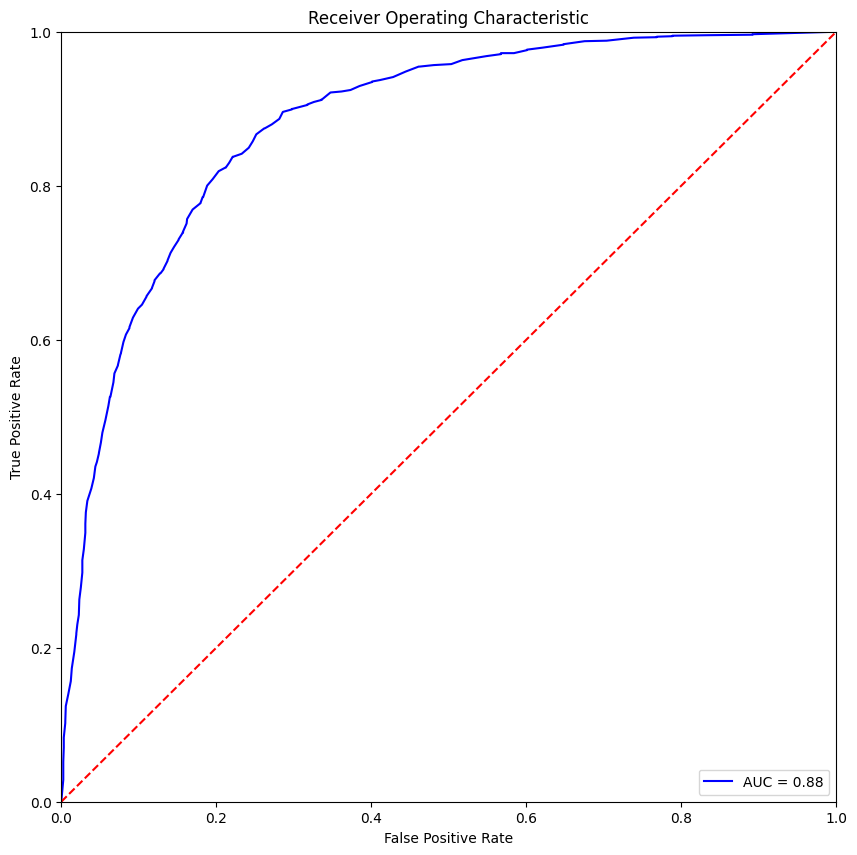

In [109]:
from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(Y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Xgb Classifier

In [111]:
model = xgb.XGBClassifier()
model.fit(X_train_transformed, Y_train)
Y_predictions = model.predict(X_cv_transformed)

In [113]:
print(confusion_matrix(Y_cv, Y_predictions))

[[1331  215]
 [ 293 1253]]


In [114]:
print(classification_report(Y_cv, Y_predictions))

              precision    recall  f1-score   support

       False       0.82      0.86      0.84      1546
        True       0.85      0.81      0.83      1546

    accuracy                           0.84      3092
   macro avg       0.84      0.84      0.84      3092
weighted avg       0.84      0.84      0.84      3092



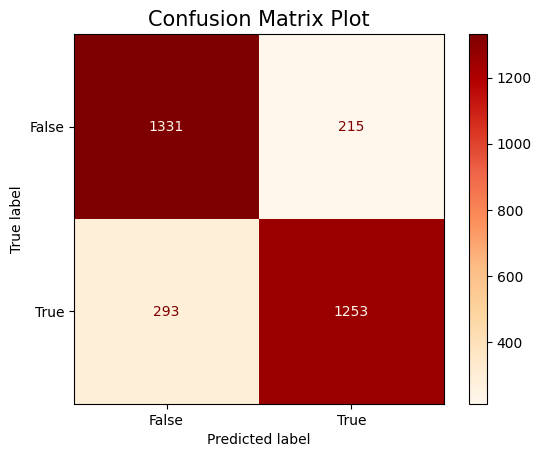

In [115]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the plot
ConfusionMatrixDisplay.from_estimator(model, X_cv_transformed, Y_cv, cmap='OrRd')

plt.grid(False)
plt.title("Confusion Matrix Plot", fontsize=15)
plt.show()

AUC for our classifier is: 0.9246908936637385


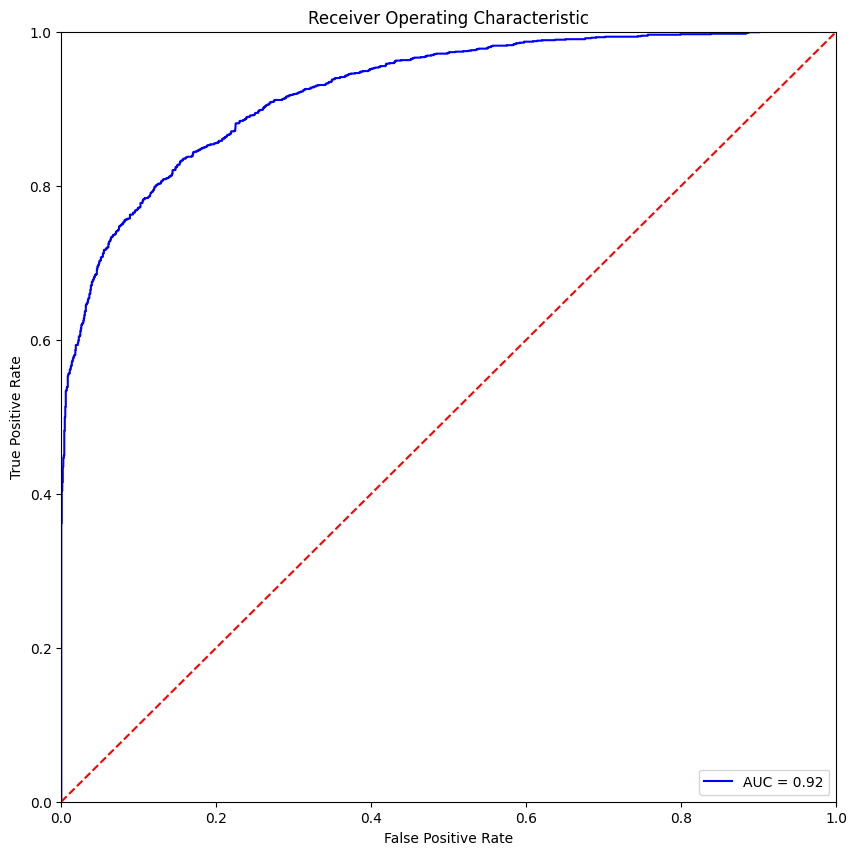

In [116]:
from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(Y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

HyperParameter Tuning of XGB model

In [117]:
sub_sample = [0.1, 0.2, 0.3, 0.5, 0.7, 1]

In [119]:
for sample_value in sub_sample:
  model = xgb.XGBClassifier(subsample = sample_value, eval_metric = 'logloss', n_jobs = -1)
  model.fit(X_train_transformed, Y_train)
  Y_predictions = model.predict(X_cv_transformed)
  print("The percentage of samples used in XGB model = {}%".format(np.round(sample_value * 100, 2)))
  print(classification_report(Y_predictions, Y_cv))
  print("\n")

The percentage of samples used in XGB model = 10.0%
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1594
           1       0.79      0.81      0.80      1498

    accuracy                           0.80      3092
   macro avg       0.80      0.80      0.80      3092
weighted avg       0.80      0.80      0.80      3092



The percentage of samples used in XGB model = 20.0%
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1596
           1       0.80      0.82      0.81      1496

    accuracy                           0.81      3092
   macro avg       0.81      0.81      0.81      3092
weighted avg       0.81      0.81      0.81      3092



The percentage of samples used in XGB model = 30.0%
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1619
           1       0.80      0.84      0.82      1473

    accuracy          

In [121]:
max_depth_values = [1, 2, 3, 5, 10, 50, 100]
for depth in max_depth_values:
  model = xgb.XGBClassifier(max_depth = depth, eval_metric = 'logloss', n_jobs = -1)
  model.fit(X_train_transformed, Y_train)
  print("The depth of the trees = {}".format(depth, 2))
  Y_predictions = model.predict(X_cv_transformed)
  print(classification_report(Y_predictions, Y_cv))
  print("\n")

The depth of the trees = 1
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1493
           1       0.83      0.80      0.82      1599

    accuracy                           0.81      3092
   macro avg       0.81      0.81      0.81      3092
weighted avg       0.81      0.81      0.81      3092



The depth of the trees = 2
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1568
           1       0.84      0.85      0.85      1524

    accuracy                           0.85      3092
   macro avg       0.85      0.85      0.85      3092
weighted avg       0.85      0.85      0.85      3092



The depth of the trees = 3
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1593
           1       0.83      0.86      0.85      1499

    accuracy                           0.85      3092
   macro avg       0.85      0.85      0.85

In [124]:
num_estimator_values = [1, 2, 5, 10, 20, 50, 100, 500]
for estimators in num_estimator_values:
    model = xgb.XGBClassifier(n_estimators = estimators, eval_metric = 'logloss', n_jobs = -1)
    model.fit(X_train_transformed, Y_train)
    y_predictions = model.predict(X_cv_transformed)
    print("The total number of estimators used in XGB model = {}".format(estimators))
    print(classification_report(Y_predictions, Y_cv))
    print("\n")


The total number of estimators used in XGB model = 1
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1666
           1       0.77      0.84      0.80      1426

    accuracy                           0.81      3092
   macro avg       0.81      0.81      0.81      3092
weighted avg       0.81      0.81      0.81      3092



The total number of estimators used in XGB model = 2
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1666
           1       0.77      0.84      0.80      1426

    accuracy                           0.81      3092
   macro avg       0.81      0.81      0.81      3092
weighted avg       0.81      0.81      0.81      3092



The total number of estimators used in XGB model = 5
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1666
           1       0.77      0.84      0.80      1426

    accuracy       

In [125]:
best_number_of_estimators = 100
best_subsamples = 1
best_max_depth_values = 2

model = xgb.XGBClassifier(n_estimators = best_number_of_estimators, max_depth = best_max_depth_values,
                         subsample = best_subsamples, eval_metric = 'logloss', n_jobs = -1)
model.fit(X_train_transformed, Y_train)
y_predictions = model.predict(X_cv_transformed)
print(classification_report(Y_predictions, Y_cv))


              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1666
           1       0.77      0.84      0.80      1426

    accuracy                           0.81      3092
   macro avg       0.81      0.81      0.81      3092
weighted avg       0.81      0.81      0.81      3092



In [126]:
print(confusion_matrix(Y_cv, Y_predictions))

[[1313  233]
 [ 353 1193]]


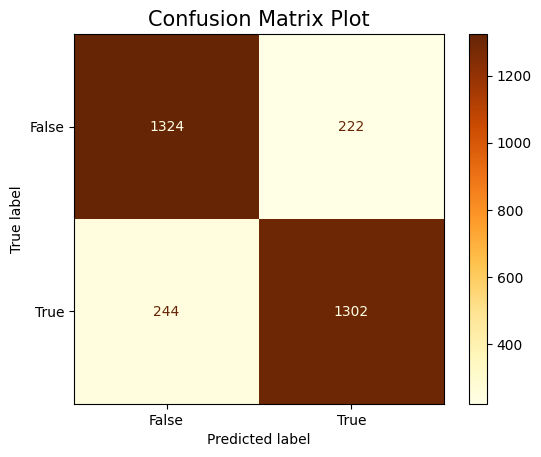

In [127]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the plot
ConfusionMatrixDisplay.from_estimator(model, X_cv_transformed, Y_cv, cmap='YlOrBr')

plt.grid(False)
plt.title("Confusion Matrix Plot", fontsize=15)
plt.show()

AUC for our classifier is: 0.9342312255974188


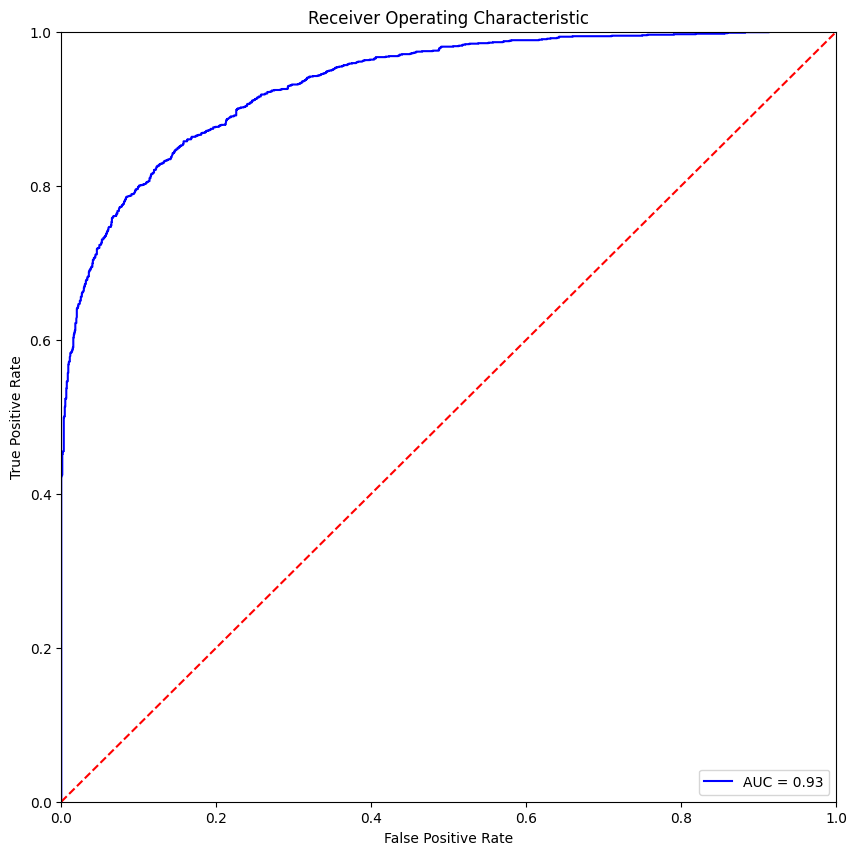

In [128]:
from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(Y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Model Evaluation and Interpretation

In [129]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [131]:
print("The precision score of the best XGB model is: {:.2f}".format(precision_score(Y_predictions, Y_cv)))
print("The recall score of the best XGB model is: {:.2f}".format(recall_score(Y_predictions, Y_cv)))
print("The f1 score of the best XGB model is: {:.2f}".format(f1_score(Y_predictions, Y_cv)))
print("The micro f1 score of the best XGB model is: {:.2f}".format(f1_score(Y_predictions, Y_cv, average = 'micro')))
print("The macro f1 score of the best XGB model is: {:.2f}".format(f1_score(Y_predictions, Y_cv, average = 'macro')))
print("The accuracy of the best XGB model is: {:.2f}%".format(accuracy_score(Y_predictions, Y_cv) * 100))


The precision score of the best XGB model is: 0.77
The recall score of the best XGB model is: 0.84
The f1 score of the best XGB model is: 0.80
The micro f1 score of the best XGB model is: 0.81
The macro f1 score of the best XGB model is: 0.81
The accuracy of the best XGB model is: 81.05%


# **Observation:**

1. It could be seen based on the results that the model that we have chosen and hyperparameter tuned (XGboost) is performing really well on the cross-validation data.
2. Therefore, the model would be able to predict whether a customer is going to churn (leave the service) or not with an accuracy of about 80% which is not bad for a model that contains imbalanced data along with less number of samples that is completely contrary to a real-world problem that contains millions of customers or data points respectively.
3. Therefore, we can expect similar performance of the model on the test data as well provided that the distribution of the data does not change compared to the cross-validation data.